In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

In [2]:
os.chdir('../')

In [32]:

train = pd.read_csv('data/rossmann/train.csv')
sample = pd.read_csv('data/rossmann/sample_submission.csv')
test = pd.read_csv('data/rossmann/test.csv')
store = pd.read_csv('data/rossmann/store.csv')

C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\1730464987.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('data/rossmann/train.csv')


In [4]:
# Merge the store data with training and test data
train_data = pd.merge(train, store, on='Store')
test_data = pd.merge(test, store, on='Store')

In [5]:
from scripts.preprocessing import preprocess_data


df, label_encoders, scaler =preprocess_data(train_data)

c:\Users\windows 10\Desktop\Pharmaceuticals-_machine_learning\Pharmaceuticals-_machine_learning\scripts\preprocessing.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].max() + 1, inplace=True)
c:\Users\windows 10\Desktop\Pharmaceuticals-_machine_learning\Pharmaceuticals-_machine_learning\scripts\preprocessing.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will chan

In [35]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
from scripts.preprocessing import count_missing_values


mis, missp = count_missing_values(df)
print(missp)

#### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?


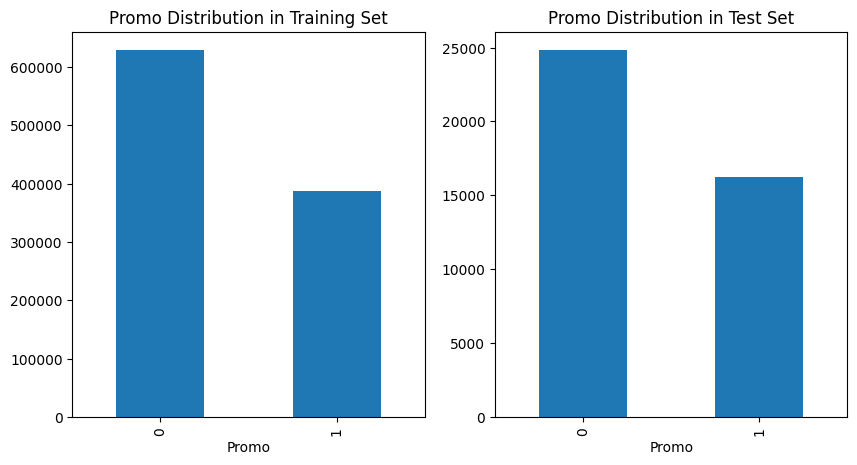

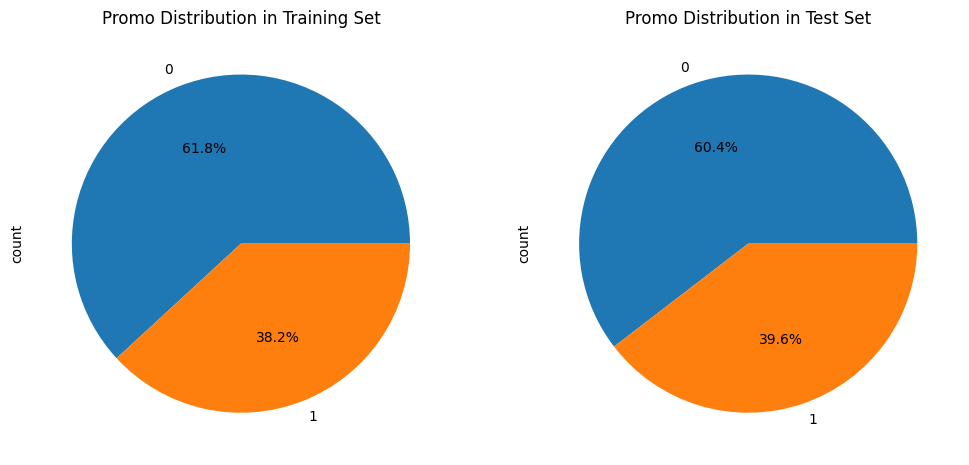

In [15]:


# Extract promotion columns
train_promo = train_data[['Promo', 'Promo2']]
test_promo = test_data[['Promo', 'Promo2']]

# Bar charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
train_promo['Promo'].value_counts().plot(kind='bar', ax=axes[ 0], title="Promo Distribution in Training Set")
test_promo['Promo'].value_counts().plot(kind='bar', ax=axes[ 1], title="Promo Distribution in Test Set")
plt.show()

# Pie charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
train_promo['Promo'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0], title="Promo Distribution in Training Set")
test_promo['Promo'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1], title="Promo Distribution in Test Set")
plt.show()



#### Check & compare sales behavior before, during, and after holidays

Average Sales on Holidays: 4684.874236685952
Average Sales on Non-Holidays: 5980.279716566853


C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\627856071.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HolidayType', y='AverageSales', data=comparison_df, palette='coolwarm')


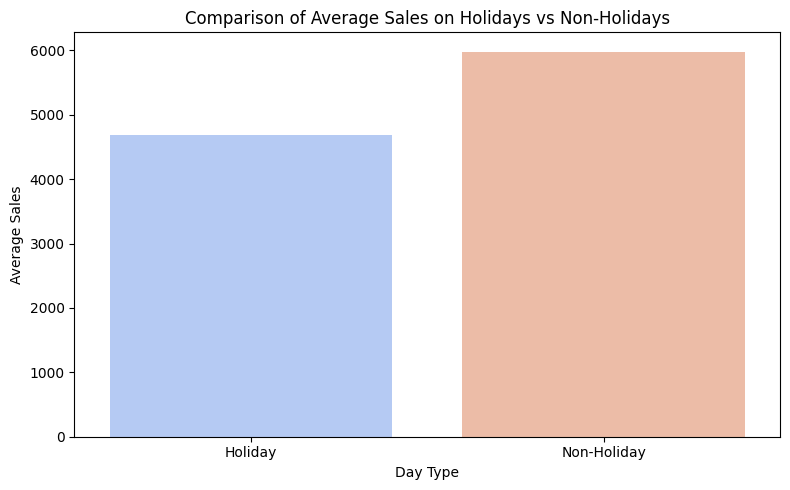

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a dataframe 'df' with your data

def compare_sales_on_holidays(df):
    # Filter rows where StateHoliday is not 0 (holiday days)
    holiday_sales = train[(train['StateHoliday'] == 0) | (train['StateHoliday'] == 'a') | (train['StateHoliday'] == 'b') | (train['StateHoliday'] == 'c')]

    # Filter rows where StateHoliday is 0 (non-holiday days)
    non_holiday_sales = train[train['StateHoliday'] == "0"]

    # Calculate the average sales for holiday and non-holiday days
    avg_holiday_sales = holiday_sales['Sales'].mean()
    avg_non_holiday_sales = non_holiday_sales['Sales'].mean()

    # Print comparison results
    print(f"Average Sales on Holidays: {avg_holiday_sales}")
    print(f"Average Sales on Non-Holidays: {avg_non_holiday_sales}")

    # Prepare data for visualization
    comparison_df = pd.DataFrame({
        'HolidayType': ['Holiday', 'Non-Holiday'],
        'AverageSales': [avg_holiday_sales, avg_non_holiday_sales]
    })
   

    # Plot the comparison
    plt.figure(figsize=(8, 5))
    sns.barplot(x='HolidayType', y='AverageSales', data=comparison_df, palette='coolwarm')
    plt.title('Comparison of Average Sales on Holidays vs Non-Holidays')
    plt.ylabel('Average Sales')
    plt.xlabel('Day Type')
    plt.tight_layout()
    plt.show()

# Example usage with your dataframe
compare_sales_on_holidays(df)


In [73]:
import pandas as pd

# Assuming 'train' is your original dataframe

# Step 1: Convert the 'Date' column to datetime if it's not already in datetime format
train['Date'] = pd.to_datetime(train['Date'])

# Step 2: Filter the data where 'StateHoliday' is 'a', 'b', or 'c'
holiday_df = train[train['StateHoliday'].isin(['a', 'b', 'c'])]

# Step 3: Extend the data to include 7 days before and 7 days after each holiday
def get_holiday_window(df, days_before=7, days_after=7):
    # Create a list to collect all date ranges
    all_dates = []
    
    for holiday_date in df['Date']:
        # Generate a date range for each holiday
        date_range = pd.date_range(holiday_date - pd.DateOffset(days=days_before), 
                                   holiday_date + pd.DateOffset(days=days_after))
        all_dates.append(pd.Series(date_range))

    # Concatenate all date ranges into a single Series and drop duplicates
    all_dates = pd.concat(all_dates).drop_duplicates()

    # Filter the original DataFrame for rows where 'Date' is in the extended date range
    return train[train['Date'].isin(all_dates)]

# Step 4: Get the filtered data with the 7 days before and after holidays
filtered_df_with_window = get_holiday_window(holiday_df)

# Now 'filtered_df_with_window' contains the holidays and 7 days before and after each holiday


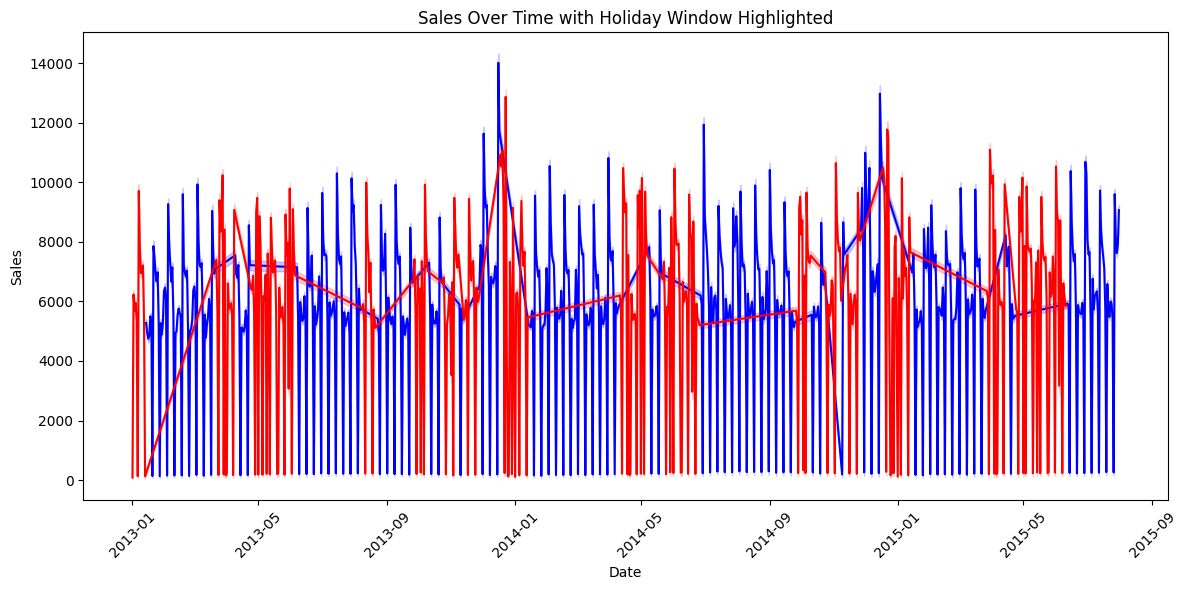

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'filtered_df_with_window' is already created with the 7 days before and after holidays

# Step 1: Create a column to indicate whether the row is part of the holiday window
train['InHolidayWindow'] = train.index.isin(filtered_df_with_window.index)

# Step 2: Plot the time series
def plot_sales_with_holiday_window(df):
    plt.figure(figsize=(12, 6))

    # Plot the sales data, color by holiday window
    sns.lineplot(x='Date', y='Sales', hue='InHolidayWindow', data=df, 
                 palette={True: 'red', False: 'blue'}, legend=False)

    # Customize the plot
    plt.title('Sales Over Time with Holiday Window Highlighted')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Step 3: Call the function to plot sales with holiday window highlight
plot_sales_with_holiday_window(train)


#### What can you say about the correlation between sales and the number of customers?

Correlation between Sales and Customers: 0.8947107733016958


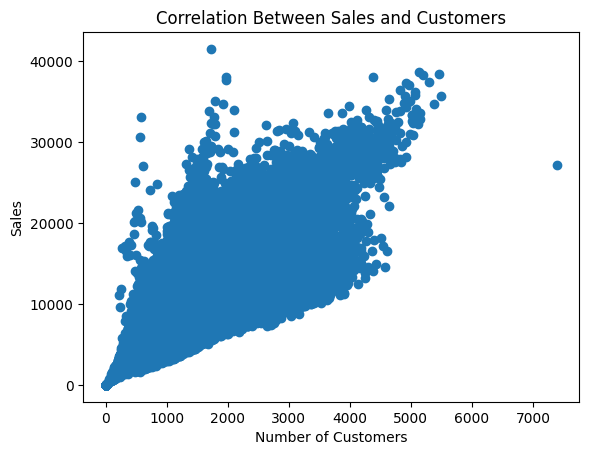

In [77]:

# Calculate correlation
correlation = train_data['Sales'].corr(train_data['Customers'])
print("Correlation between Sales and Customers:", correlation)

# Scatter plot
plt.scatter(train_data['Customers'], train_data['Sales'])
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.title('Correlation Between Sales and Customers')
plt.show()

#### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?


Average Sales During Promo: 7991.152045969903
Average Sales Without Promo: 4406.050805160786
Average Customers During Promo: 820.0988146773861
Average Customers Without Promo: 517.8235417537579
Average Sales per Customer During Promo: 9.744133149507716
Average Sales per Customer Without Promo: 8.508788129327668


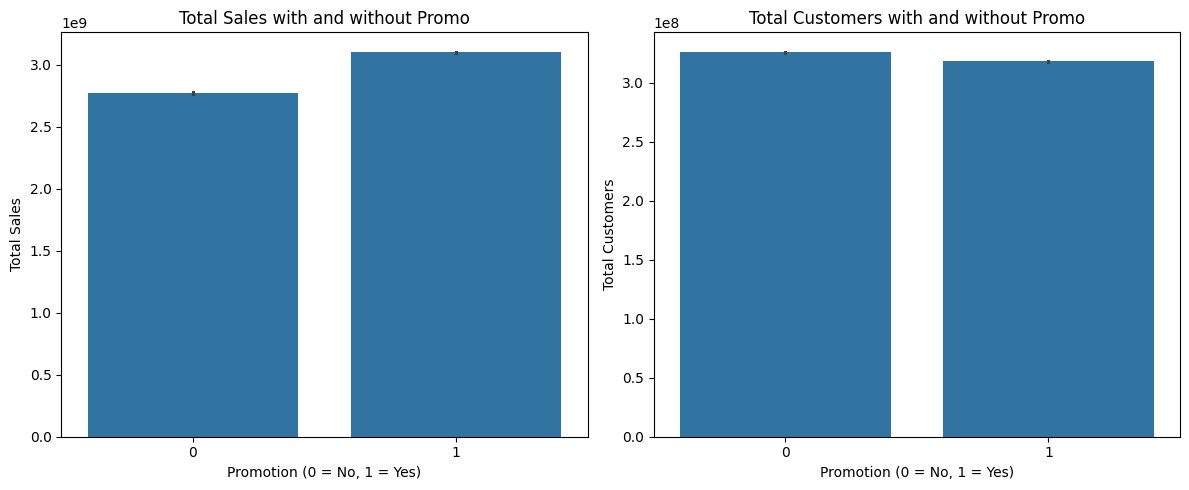

In [79]:
# Calculate average sales during promo and non-promo periods
promo_sales = df[df['Promo'] == 1]['Sales'].mean()
non_promo_sales = df[df['Promo'] == 0]['Sales'].mean()

print(f"Average Sales During Promo: {promo_sales}")
print(f"Average Sales Without Promo: {non_promo_sales}")
# Calculate average number of customers during promo and non-promo periods
promo_customers = df[df['Promo'] == 1]['Customers'].mean()
non_promo_customers = df[df['Promo'] == 0]['Customers'].mean()

print(f"Average Customers During Promo: {promo_customers}")
print(f"Average Customers Without Promo: {non_promo_customers}")
# Calculate average sales per customer during promo and non-promo periods
promo_sales_per_customer = df[df['Promo'] == 1]['Sales'].sum() / df[df['Promo'] == 1]['Customers'].sum()
non_promo_sales_per_customer = df[df['Promo'] == 0]['Sales'].sum() / df[df['Promo'] == 0]['Customers'].sum()

print(f"Average Sales per Customer During Promo: {promo_sales_per_customer}")
print(f"Average Sales per Customer Without Promo: {non_promo_sales_per_customer}")

# Creating two subplots to show the impact of promotions on sales and customers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting sales during promo vs. non-promo
sns.barplot(x='Promo', y='Sales', data=df, ax=axes[0], estimator=sum)
axes[0].set_title("Total Sales with and without Promo")
axes[0].set_xlabel("Promotion (0 = No, 1 = Yes)")
axes[0].set_ylabel("Total Sales")

# Plotting customers during promo vs. non-promo
sns.barplot(x='Promo', y='Customers', data=df, ax=axes[1], estimator=sum)
axes[1].set_title("Total Customers with and without Promo")
axes[1].set_xlabel("Promotion (0 = No, 1 = Yes)")
axes[1].set_ylabel("Total Customers")

plt.tight_layout()
plt.show()


#### Trends of customer behavior during store opening and closing times

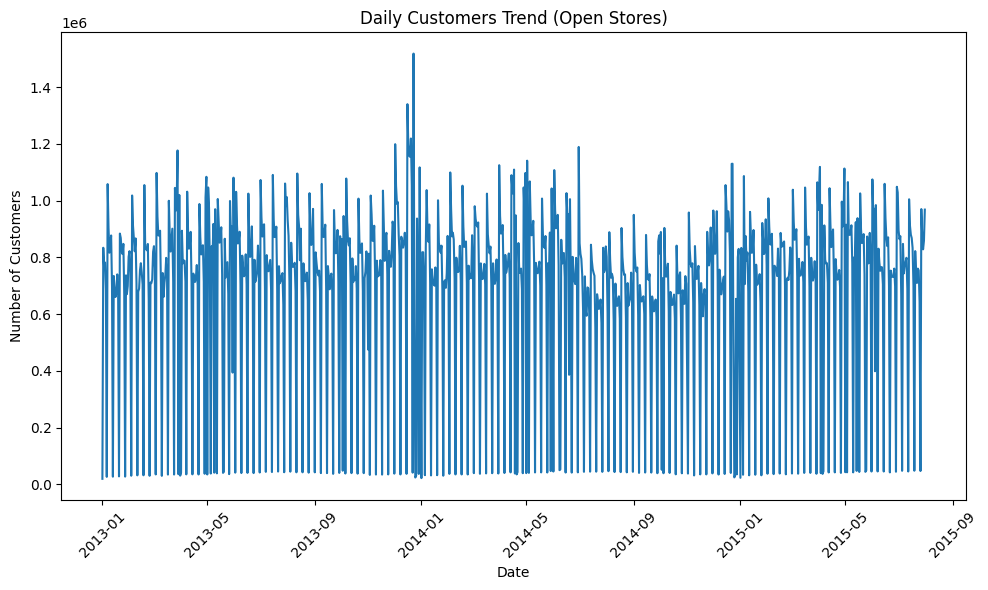

C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\1881829080.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Customers', data=dayofweek_customers, palette='viridis')


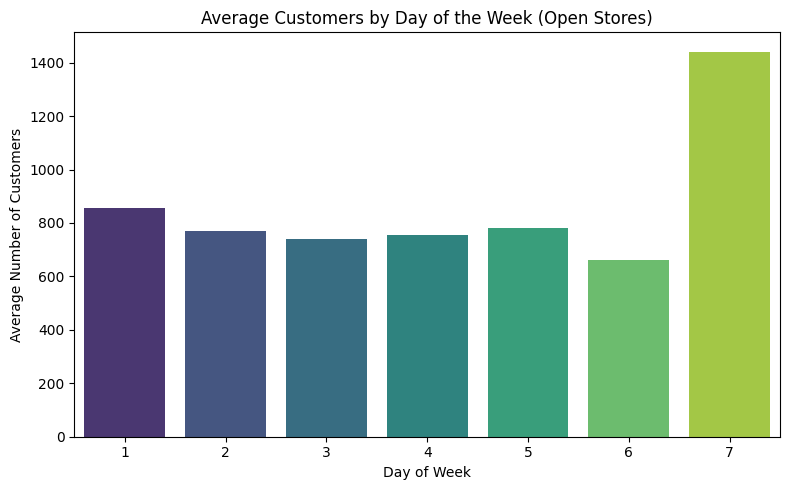

C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\1881829080.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promo', y='Customers', data=promo_customers, palette='coolwarm')


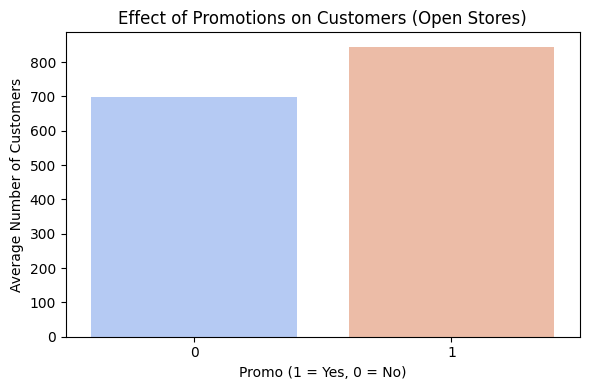

C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\1881829080.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='StateHoliday', y='Customers', data=holiday_customers, palette='Blues')


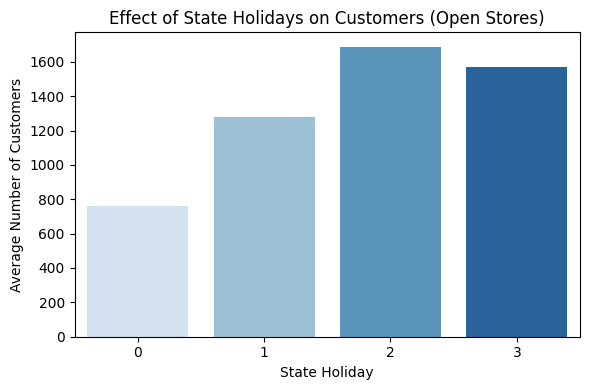

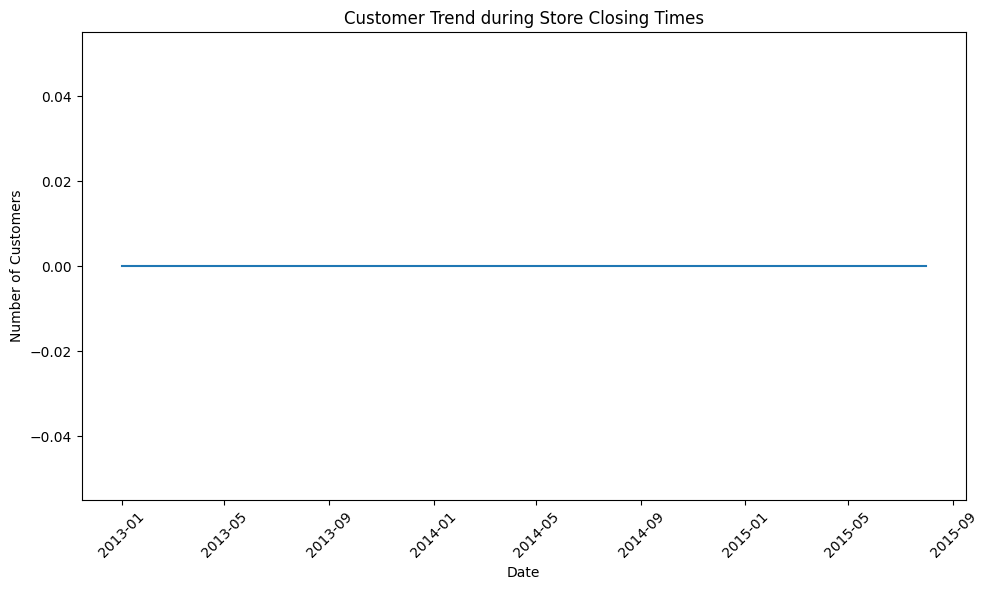

In [80]:

# Filter data where stores are open
open_stores = train_data[train_data['Open'] == 1]

# Group by 'Date' to analyze customer trends over time
daily_customers = open_stores.groupby('Date')['Customers'].sum().reset_index()

# Plot the trend of customers over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Customers', data=daily_customers)
plt.title('Daily Customers Trend (Open Stores)')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Group by 'DayOfWeek' to analyze customer behavior by day of the week
dayofweek_customers = open_stores.groupby('DayOfWeek')['Customers'].mean().reset_index()

# Plot the trend of customers by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(x='DayOfWeek', y='Customers', data=dayofweek_customers, palette='viridis')
plt.title('Average Customers by Day of the Week (Open Stores)')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Customers')
plt.tight_layout()
plt.show()

# Analyze the effect of promotions on customers
promo_customers = open_stores.groupby('Promo')['Customers'].mean().reset_index()

# Plot the effect of promotions on customers
plt.figure(figsize=(6, 4))
sns.barplot(x='Promo', y='Customers', data=promo_customers, palette='coolwarm')
plt.title('Effect of Promotions on Customers (Open Stores)')
plt.xlabel('Promo (1 = Yes, 0 = No)')
plt.ylabel('Average Number of Customers')
plt.tight_layout()
plt.show()

# Analyze the effect of State Holidays on customers
holiday_customers = open_stores.groupby('StateHoliday')['Customers'].mean().reset_index()

# Plot the effect of state holidays on customers
plt.figure(figsize=(6, 4))
sns.barplot(x='StateHoliday', y='Customers', data=holiday_customers, palette='Blues')
plt.title('Effect of State Holidays on Customers (Open Stores)')
plt.xlabel('State Holiday')
plt.ylabel('Average Number of Customers')
plt.tight_layout()
plt.show()

# Analyze trends during store closing times (Open = 0)
closed_stores = train_data[train_data['Open'] == 0]
closed_customers = closed_stores.groupby('Date')['Customers'].sum().reset_index()

# Plot customers during store closing times
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Customers', data=closed_customers)
plt.title('Customer Trend during Store Closing Times')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\3957574294.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open['Year'] = df_open['Date'].dt.year
C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\3957574294.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open['Month'] = df_open['Date'].dt.month
C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\3957574294.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

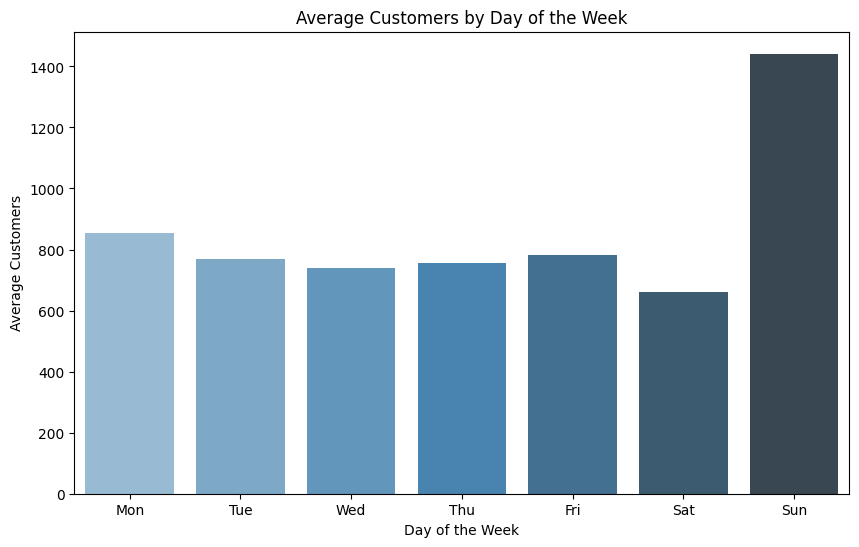

C:\Users\windows 10\AppData\Local\Temp\ipykernel_13584\3957574294.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_customers_promo.index, y=avg_customers_promo.values, palette="Greens_d")


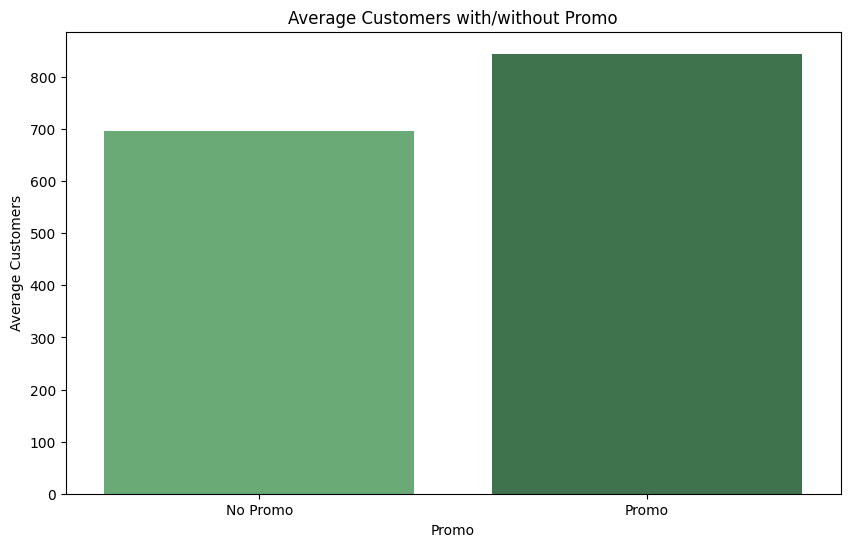

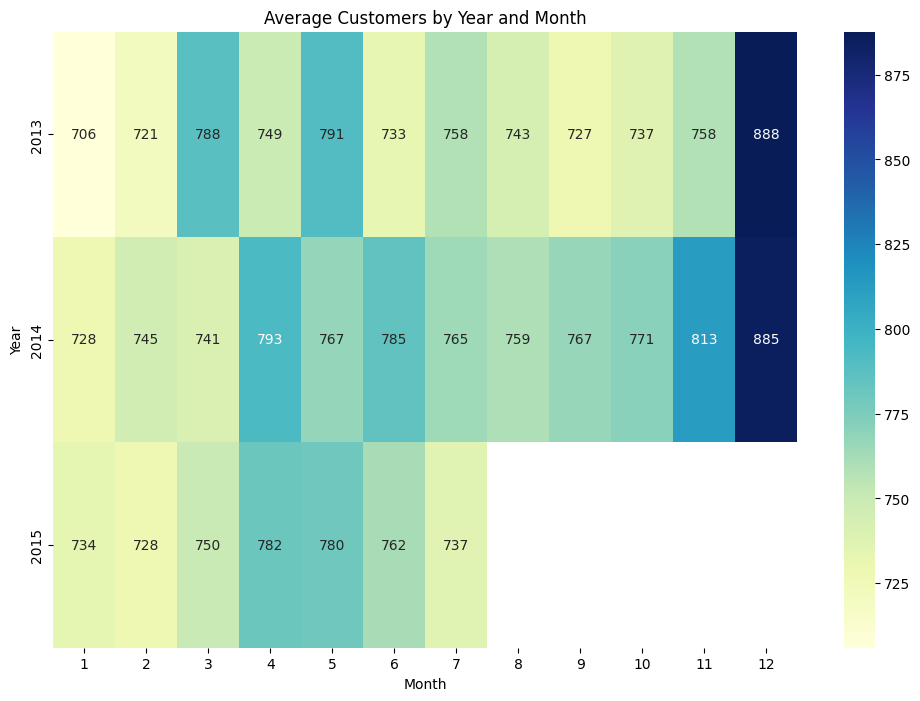

In [81]:

# Convert 'Date' to datetime format
train_data['Date'] = pd.to_datetime(df['Date'])

# Filter the data for open stores only
df_open = train_data[train_data['Open'] == 1]

# Create new time-based features (Year, Month)
df_open['Year'] = df_open['Date'].dt.year
df_open['Month'] = df_open['Date'].dt.month

# Group by DayOfWeek and calculate the average number of customers
avg_customers_per_day = df_open.groupby('DayOfWeek')['Customers'].mean()

# Plot average customers per day
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_customers_per_day.index, y=avg_customers_per_day.values, palette="Blues_d")
plt.title('Average Customers by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Customers')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Check the impact of promotions on customer counts
avg_customers_promo = df_open.groupby('Promo')['Customers'].mean()

# Plot average customers with and without promotions
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_customers_promo.index, y=avg_customers_promo.values, palette="Greens_d")
plt.title('Average Customers with/without Promo')
plt.xlabel('Promo')
plt.ylabel('Average Customers')
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'])
plt.show()

# Check trends over time (e.g., year-on-year trends)
avg_customers_per_month = df_open.groupby(['Year', 'Month'])['Customers'].mean().unstack()

# Plot trends over time
plt.figure(figsize=(12, 8))
sns.heatmap(avg_customers_per_month, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Average Customers by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


#### Which stores are open on all weekdays? How does that affect their sales on weekends? 


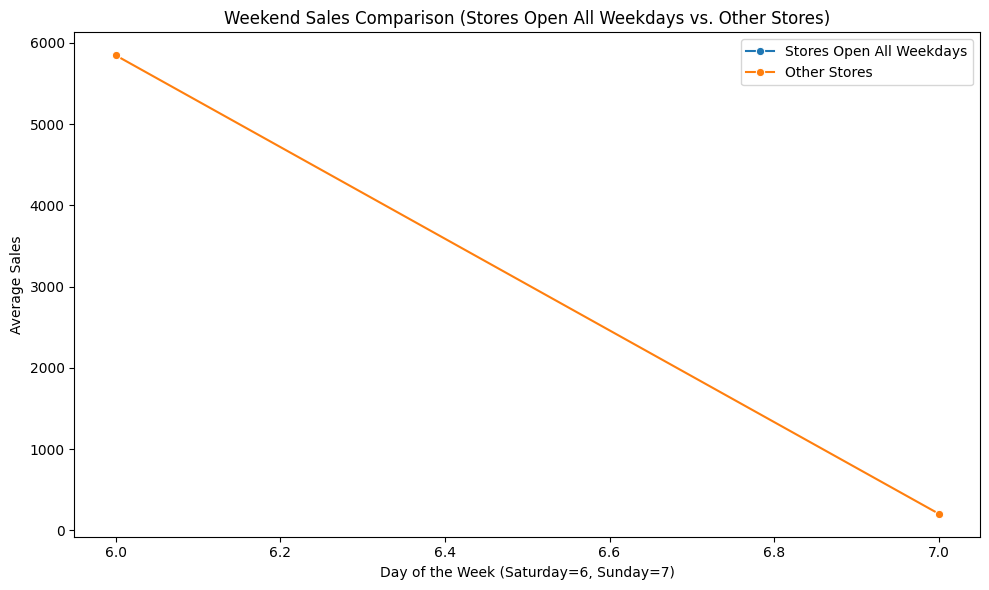

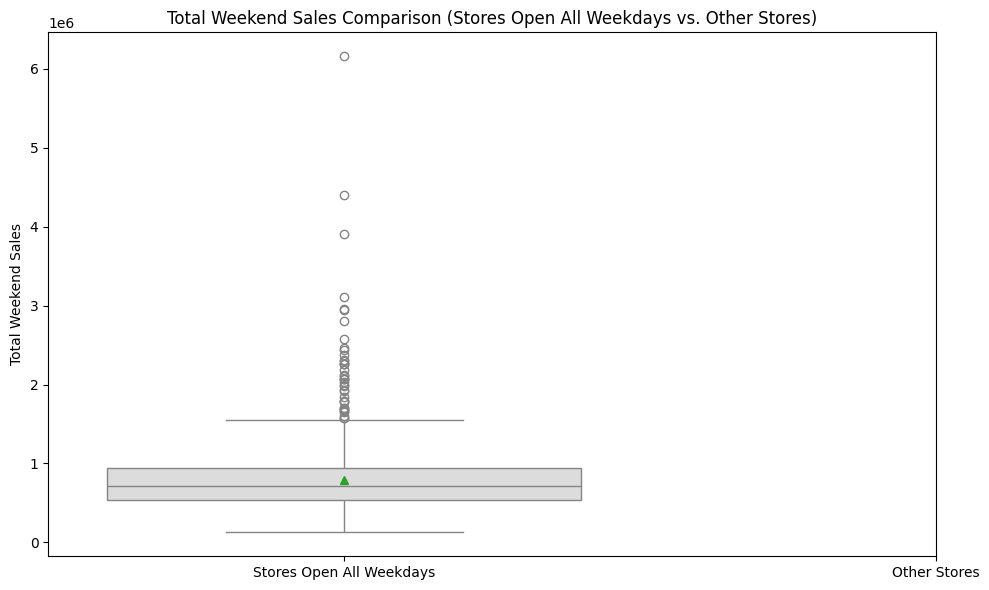

In [82]:

# Filter data for weekdays (Monday=1, ..., Friday=5)
weekday_data = train_data[train_data['DayOfWeek'].isin([1, 2, 3, 4, 5])]

# Find stores that are open every weekday (Open = 1 on all weekdays)
stores_open_all_weekdays = weekday_data.groupby('Store')['Open'].sum()
stores_open_all_weekdays = stores_open_all_weekdays[stores_open_all_weekdays == 5].index.tolist()

# Filter data for weekends (Saturday=6, Sunday=7) to analyze sales on weekends
weekend_data = train_data[train_data['DayOfWeek'].isin([6, 7])]

# Separate weekend sales for stores open all weekdays and other stores
weekend_sales_open_all_weekdays = weekend_data[weekend_data['Store'].isin(stores_open_all_weekdays)]
weekend_sales_other_stores = weekend_data[~weekend_data['Store'].isin(stores_open_all_weekdays)]

# Group by 'DayOfWeek' and calculate average sales for both groups
weekend_sales_open_all = weekend_sales_open_all_weekdays.groupby('DayOfWeek')['Sales'].mean().reset_index()
weekend_sales_other = weekend_sales_other_stores.groupby('DayOfWeek')['Sales'].mean().reset_index()

# Plot weekend sales comparison
plt.figure(figsize=(10, 6))
sns.lineplot(x='DayOfWeek', y='Sales', data=weekend_sales_open_all, label='Stores Open All Weekdays', marker='o')
sns.lineplot(x='DayOfWeek', y='Sales', data=weekend_sales_other, label='Other Stores', marker='o')
plt.title('Weekend Sales Comparison (Stores Open All Weekdays vs. Other Stores)')
plt.xlabel('Day of the Week (Saturday=6, Sunday=7)')
plt.ylabel('Average Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Additionally, you could compare total weekend sales for the two groups
total_weekend_sales_open_all = weekend_sales_open_all_weekdays.groupby('Store')['Sales'].sum().reset_index()
total_weekend_sales_other = weekend_sales_other_stores.groupby('Store')['Sales'].sum().reset_index()

# Plot total weekend sales comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=[total_weekend_sales_open_all['Sales'], total_weekend_sales_other['Sales']],
            palette='coolwarm', showmeans=True)
plt.xticks([0, 1], ['Stores Open All Weekdays', 'Other Stores'])
plt.title('Total Weekend Sales Comparison (Stores Open All Weekdays vs. Other Stores)')
plt.ylabel('Total Weekend Sales')
plt.tight_layout()
plt.show()


Check how the assortment type affects sales

C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\1469147751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='coolwarm')


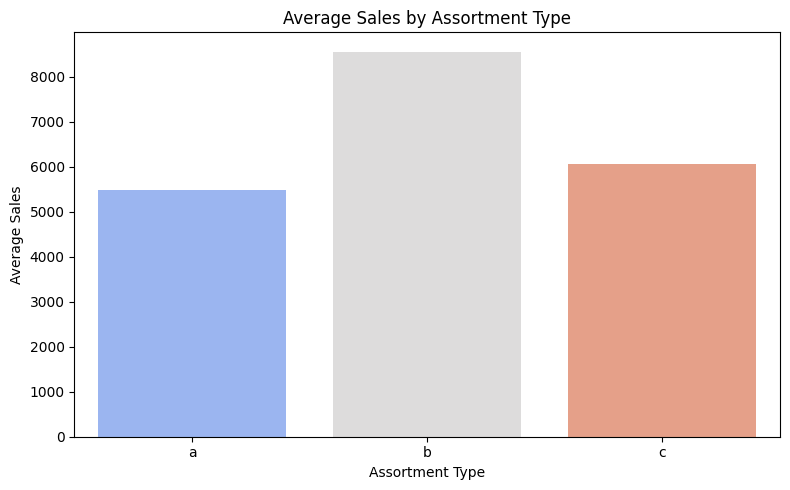

In [67]:

# Group by 'Assortment' and calculate the average sales for each assortment type
assortment_sales = train_data.groupby('Assortment')['Sales'].mean().reset_index()

# Plot the average sales for each assortment type
plt.figure(figsize=(8, 5))
sns.barplot(x='Assortment', y='Sales', data=assortment_sales, palette='coolwarm')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()


How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?


C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\238269786.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CompetitionDistanceCategory'] = pd.cut(data['CompetitionDistance'],
C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\238269786.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  competition_distance_sales = data.groupby('CompetitionDistanceCategory')['Sales'].mean().reset_index()
C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\238269786.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will b

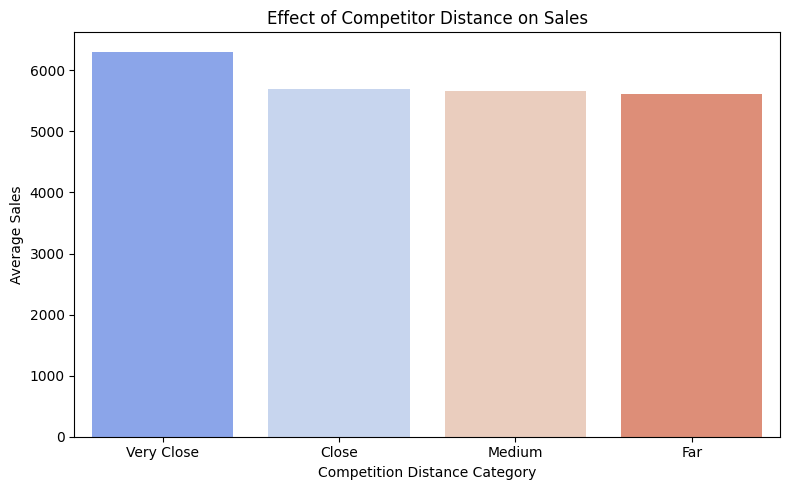

C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\238269786.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_center_competition_sales = city_center_stores.groupby('CompetitionDistanceCategory')['Sales'].mean().reset_index()
C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\238269786.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CompetitionDistanceCategory', y='Sales', data=city_center_competition_sales, palette='viridis')


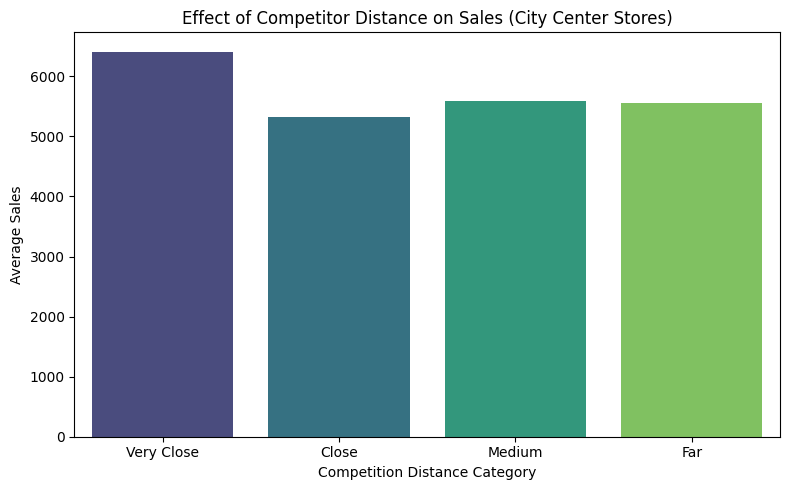

C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\238269786.py:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  non_city_center_competition_sales = non_city_center_stores.groupby('CompetitionDistanceCategory')['Sales'].mean().reset_index()
C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\238269786.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CompetitionDistanceCategory', y='Sales', data=non_city_center_competition_sales, palette='magma')


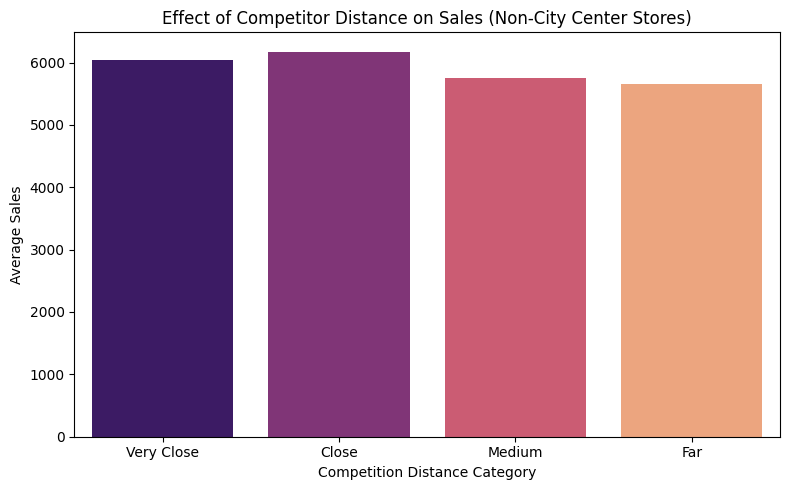

In [69]:

data = train_data

# Drop rows where CompetitionDistance is NaN (optional, depending on data quality)
data = data.dropna(subset=['CompetitionDistance'])

# Part 1: Effect of CompetitionDistance on Sales
# Categorize 'CompetitionDistance' into bins
data['CompetitionDistanceCategory'] = pd.cut(data['CompetitionDistance'], 
                                             bins=[0, 500, 1500, 3000, float('inf')], 
                                             labels=['Very Close', 'Close', 'Medium', 'Far'])

# Group by 'CompetitionDistanceCategory' and calculate the average sales
competition_distance_sales = data.groupby('CompetitionDistanceCategory')['Sales'].mean().reset_index()

# Plot the effect of competitor distance on sales
plt.figure(figsize=(8, 5))
sns.barplot(x='CompetitionDistanceCategory', y='Sales', data=competition_distance_sales, palette='coolwarm')
plt.title('Effect of Competitor Distance on Sales')
plt.xlabel('Competition Distance Category')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

# Part 2: Effect of Competitor Distance in City Centers
# Assuming 'StoreType' identifies city center stores (modify as per your data)
city_center_store_types = ['a']  # Example, store type 'a' represents city center stores (adjust as needed)

# Filter city center stores
city_center_stores = data[data['StoreType'].isin(city_center_store_types)]

# Group by 'CompetitionDistanceCategory' for city-center stores and calculate average sales
city_center_competition_sales = city_center_stores.groupby('CompetitionDistanceCategory')['Sales'].mean().reset_index()

# Plot the effect of competitor distance on sales in city centers
plt.figure(figsize=(8, 5))
sns.barplot(x='CompetitionDistanceCategory', y='Sales', data=city_center_competition_sales, palette='viridis')
plt.title('Effect of Competitor Distance on Sales (City Center Stores)')
plt.xlabel('Competition Distance Category')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

# For comparison: Non-city center stores (optional, depending on your needs)
non_city_center_stores = data[~data['StoreType'].isin(city_center_store_types)]

# Group by 'CompetitionDistanceCategory' for non-city-center stores and calculate average sales
non_city_center_competition_sales = non_city_center_stores.groupby('CompetitionDistanceCategory')['Sales'].mean().reset_index()

# Plot for non-city-center stores
plt.figure(figsize=(8, 5))
sns.barplot(x='CompetitionDistanceCategory', y='Sales', data=non_city_center_competition_sales, palette='magma')
plt.title('Effect of Competitor Distance on Sales (Non-City Center Stores)')
plt.xlabel('Competition Distance Category')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()


How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance


In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming the dataset is in a CSV file named 'store_data.csv')
data = train_data

# Sort the data by 'Store' and 'Date' to ensure we analyze changes over time
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by=['Store', 'Date'])

# Part 1: Identify stores where CompetitionDistance was initially NA and later changed to a value
# Create a new column to track whether the competition was NA (initially) or had a value
data['CompetitionDistanceNA'] = data['CompetitionDistance'].isna()

# Identify stores that had NA and later received a competition distance value
# Filter stores where initially CompetitionDistance is NA and later becomes non-NA
stores_with_competitor_entry = data.groupby('Store').apply(
    lambda x: (x['CompetitionDistanceNA'].any() and ~x['CompetitionDistanceNA'].all())
).reset_index()
stores_with_competitor_entry.columns = ['Store', 'CompetitorEntered']
stores_with_competitor_entry = stores_with_competitor_entry[stores_with_competitor_entry['CompetitorEntered']]

# Debugging: Print the stores where a competitor entered
print("Stores with competitor entry detected:")
print(stores_with_competitor_entry)

# Filter the data for only those stores where a new competitor entered
competitor_affected_data = data[data['Store'].isin(stores_with_competitor_entry['Store'])]

# Part 2: Track the date when the competitor entered (first valid CompetitionDistance value)
competitor_affected_data['CompetitorEnteredDate'] = competitor_affected_data.groupby('Store')['CompetitionDistance'].transform(
    lambda x: competitor_affected_data.loc[x.first_valid_index(), 'Date'] if x.notna().any() else pd.NaT
)

# Debugging: Check if 'CompetitorEnteredDate' is populated correctly
print("Sample data with 'CompetitorEnteredDate' populated:")
print(competitor_affected_data[['Store', 'Date', 'CompetitionDistance', 'CompetitorEnteredDate']].head(10))

# Part 3: Split the data into "Before" and "After" the competitor's entry based on 'Date' and 'CompetitorEnteredDate'
competitor_affected_data['Period'] = competitor_affected_data.apply(
    lambda row: 'Before Competitor' if row['Date'] < row['CompetitorEnteredDate'] else 'After Competitor', axis=1
)

# Debugging: Check if 'Period' column is correctly populated
print("Sample data with 'Period' column:")
print(competitor_affected_data[['Store', 'Date', 'Sales', 'CompetitorEnteredDate', 'Period']].head(10))

# Part 4: Calculate average sales before and after the competitor entered
sales_before_after = competitor_affected_data.groupby(['Store', 'Period'])['Sales'].mean().reset_index()

# Debugging: Check if 'sales_before_after' contains data
print("Sales before and after competitor entry:")
print(sales_before_after.head(10))

# Part 5: Visualize the effect of new competitors on sales before and after competitor entry
if not sales_before_after.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Period', y='Sales', data=sales_before_after, palette='coolwarm')
    plt.title('Sales Before and After Competitor Entry')
    plt.xlabel('Period')
    plt.ylabel('Average Sales')
    plt.tight_layout()
    plt.show()
else:
    print("No data to display in the boxplot.")

# Part 6: Optional: Analyze overall trend for these stores
sales_trend = competitor_affected_data.groupby(['Date', 'Period'])['Sales'].mean().reset_index()

# Debugging: Check if 'sales_trend' contains data
print("Sales trend before and after competitor entry:")
print(sales_trend.head(10))

# Plot the overall sales trend for stores before and after competitor entry
if not sales_trend.empty:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Sales', hue='Period', data=sales_trend, marker='o')
    plt.title('Sales Trend Before and After Competitor Entry')
    plt.xticks(rotation=45)
    plt.xlabel('Date')
    plt.ylabel('Average Sales')
    plt.tight_layout()
    plt.show()
else:
    print("No data to display in the lineplot.")


C:\Users\windows 10\AppData\Local\Temp\ipykernel_4092\2101587617.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stores_with_competitor_entry = data.groupby('Store').apply(


Stores with competitor entry detected:
Empty DataFrame
Columns: [Store, CompetitorEntered]
Index: []
Sample data with 'CompetitorEnteredDate' populated:
Empty DataFrame
Columns: [Store, Date, CompetitionDistance, CompetitorEnteredDate]
Index: []
Sample data with 'Period' column:
Empty DataFrame
Columns: [Store, Date, Sales, CompetitorEnteredDate, Period]
Index: []
Sales before and after competitor entry:
Empty DataFrame
Columns: [Store, Period, Sales]
Index: []
No data to display in the boxplot.
Sales trend before and after competitor entry:
Empty DataFrame
Columns: [Date, Period, Sales]
Index: []
No data to display in the lineplot.
